# Heart_Disease_Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.target = data.target.map({0:1, 1:0})
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


## Exploratory Data Analysis

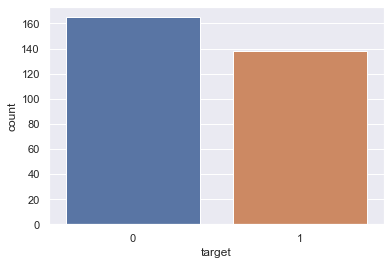

In [6]:
sns.countplot(data.target);

In [7]:
data.target.value_counts()

0    165
1    138
Name: target, dtype: int64

In [8]:
data.target.value_counts()[0]/data.target.value_counts().sum()

0.5445544554455446

 Value between 45-55% is acceptable. Hence, we dont need to balance the dataset. 

### Age:

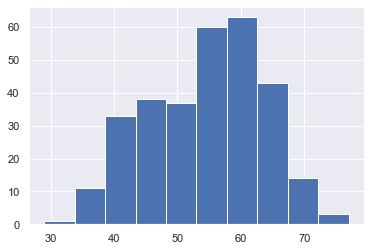

In [9]:
data.age.hist()

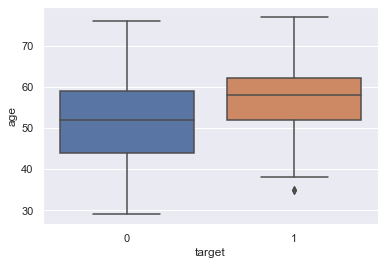

In [10]:
sns.boxplot(data.target, data.age);

We can see that aged people have higher chance of having a heart disease. Although, there seem to be some outliers too.

### Cholestrol:

Hypothesis: People with high cholestrol have higher chance of having heart disease.

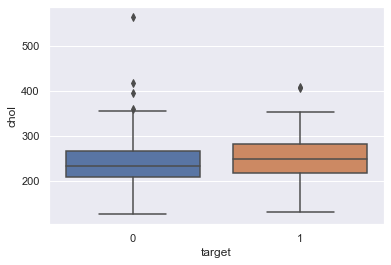

In [11]:
sns.boxplot(data.target, data.chol);

We can see that cholestrol is not a significant feature for classifying 

### Chest Pain:

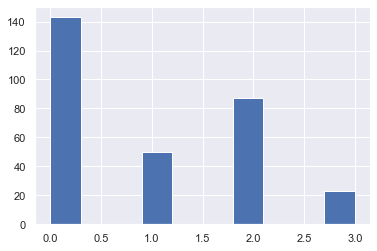

In [12]:
data.cp.hist();

### Resting BP:

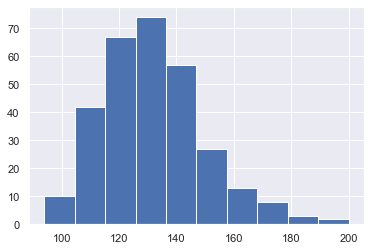

In [13]:
data.trestbps.hist();

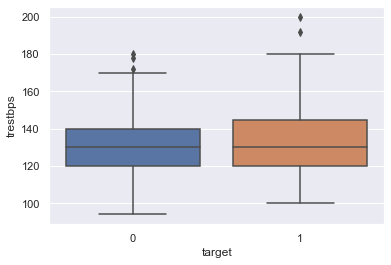

In [14]:
sns.boxplot(data.target, data.trestbps);

### Maximum Heart Rate Achieved:

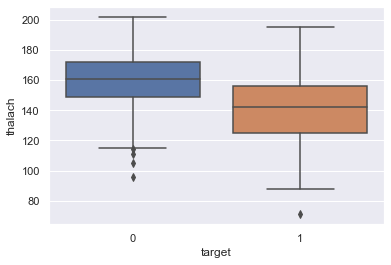

In [15]:
sns.boxplot(data.target,data.thalach);

We can see that in patients with heart disease, resting heart rate is low. This is a significant feature for classifying. 

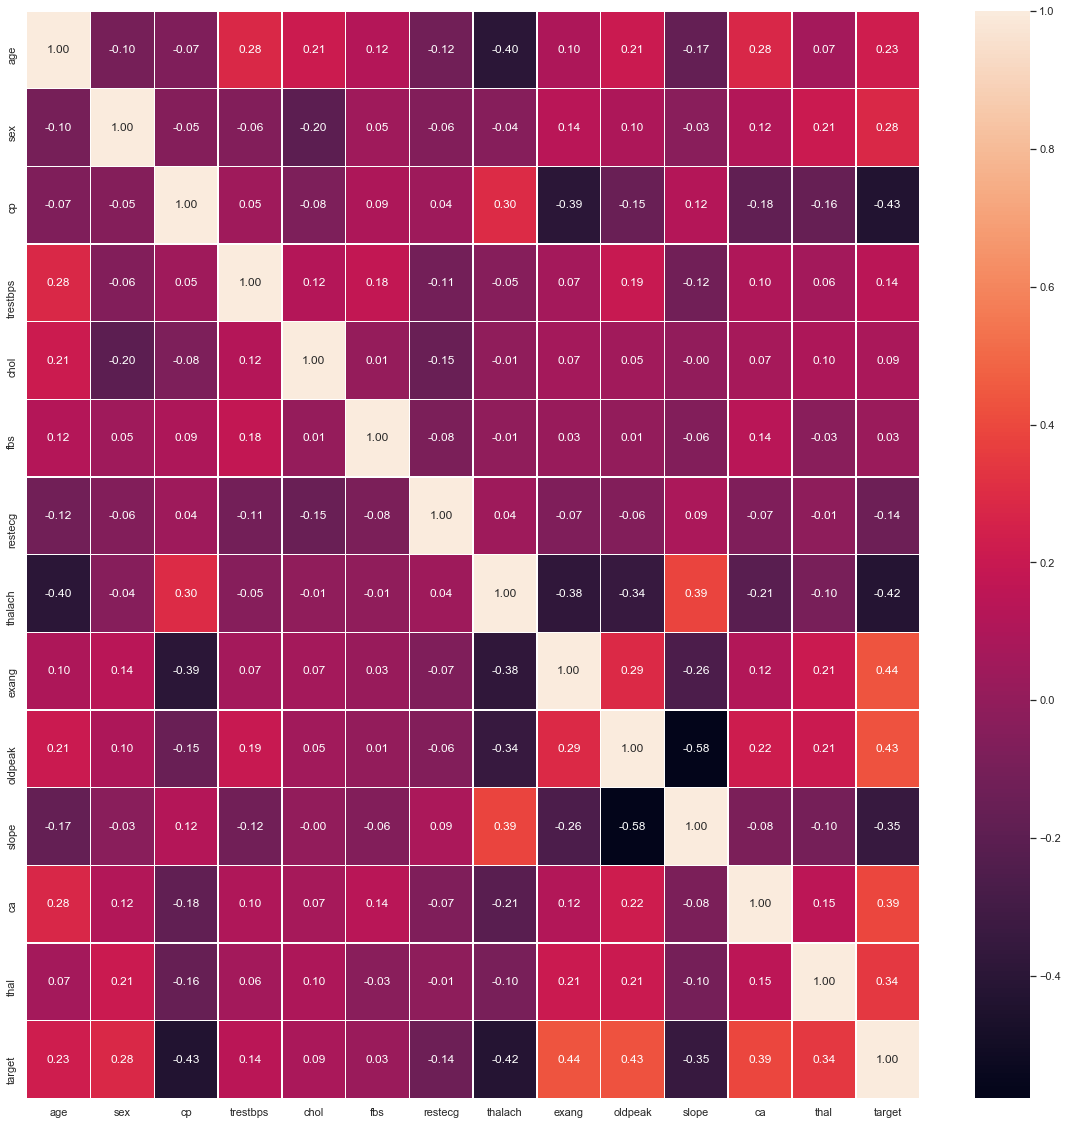

In [16]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax);

We can see that there exists no significant collinearity between features. Hence, our dataset doesnt suffer from multicollinearity.

In [17]:
#Checking scores (impact) of predictors
from sklearn.feature_selection import SelectKBest, chi2


bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(data.drop('target', axis=1), data.target)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(data.drop('target', axis=1).columns.values)

featurescores = pd.concat([df_columns, df_scores], axis=1)
featurescores.columns = ['Features', 'Score']
print(featurescores.nlargest(13, 'Score'))
print('----------------------------------------------------------------------------------')
print('These are the scores of all the features of the dataset ranking from top to bottom')

    Features       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271
5        fbs    0.202934
----------------------------------------------------------------------------------
These are the scores of all the features of the dataset ranking from top to bottom


## Hence, we have succesfully preprocessed our dataset.

In [18]:
# Converting to csv file
data.to_csv('heart_preprocessed.csv', index=False)